### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
tf.set_random_seed(42)

C:\Users\rames\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
tf.__version__

'1.9.0'

### Collect Data

In [4]:
import keras

import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.optimizers import SGD
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Reshape, Dense, Flatten, Dropout,MaxPooling2D, BatchNormalization

Using TensorFlow backend.


In [5]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [6]:
print(testY[0:5])

[9 2 1 1 6]


In [7]:
trainY.shape

(60000,)

In [8]:
print("x_train shape:", trainX.shape, "y_train shape:", trainY.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [9]:
train_Y = tf.keras.utils.to_categorical(trainY, num_classes=10)
test_Y = tf.keras.utils.to_categorical(testY, num_classes=10)

In [10]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000,)
First 5 examples now are:  [9 0 0 3 0]


In [11]:
trainX = trainX / 255.0
testX = testX / 255.0

### Visualize the data

Plot first 10 images in the triaining set and their labels.

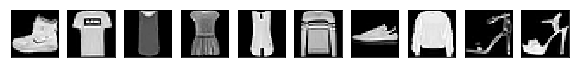

In [12]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    ##plt.grid(False)
    plt.imshow(trainX[i], cmap='gray')#cmap=plt.cm.binary)
    ##plt.xlabel(trainY[i])
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [13]:
model = Sequential()
model.add(Reshape((784,),input_shape=(28,28,)))
model.add(Dense(units=100,activation="relu"))
model.add(Dense(units=10,activation="softmax"))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [14]:
model_history = model.fit(trainX, train_Y, 
          validation_data=(testX, test_Y), 
          epochs=5,
          batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 54us/step - loss: 1.0400 - acc: 0.6744 - val_loss: 0.7438 - val_acc: 0.7561
Epoch 2/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.6582 - acc: 0.7871 - val_loss: 0.6275 - val_acc: 0.7897
Epoch 3/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.5786 - acc: 0.8089 - val_loss: 0.5752 - val_acc: 0.8055
Epoch 4/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.5363 - acc: 0.8206 - val_loss: 0.5517 - val_acc: 0.8088
Epoch 5/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.5095 - acc: 0.8280 - val_loss: 0.5237 - val_acc: 0.8195


In [15]:
print(model_history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


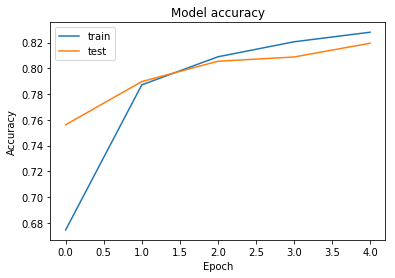

In [16]:
# Model Accuracy 
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

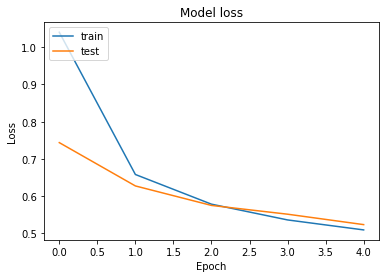

In [17]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
accuracy = model.evaluate(x=testX,y=test_Y,batch_size=10)
print("Accuracy: ", accuracy[1])

10000/10000 [==============================] - 1s 74us/step
Accuracy:  0.8194999954104424


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [19]:
model = Sequential()
model.add(Reshape((784,),input_shape=(28,28,)))
model.add(BatchNormalization(input_shape=(13,)))
model.add(Dense(units=100,activation="relu"))
model.add(Dense(units=10,activation="softmax"))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [20]:
model_history = model.fit(trainX, train_Y, 
          validation_data=(testX, test_Y), 
          epochs=5,
          batch_size=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 18s 303us/step - loss: 0.5492 - acc: 0.8041 - val_loss: 0.4138 - val_acc: 0.8523
Epoch 2/5
60000/60000 [==============================] - 18s 298us/step - loss: 0.4287 - acc: 0.8450 - val_loss: 0.3804 - val_acc: 0.8614
Epoch 3/5
60000/60000 [==============================] - 18s 304us/step - loss: 0.3983 - acc: 0.8559 - val_loss: 0.3808 - val_acc: 0.8620
Epoch 4/5
60000/60000 [==============================] - 18s 304us/step - loss: 0.3747 - acc: 0.8640 - val_loss: 0.3674 - val_acc: 0.8676
Epoch 5/5
60000/60000 [==============================] - 18s 304us/step - loss: 0.3585 - acc: 0.8693 - val_loss: 0.3543 - val_acc: 0.8717


In [21]:
print(model_history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


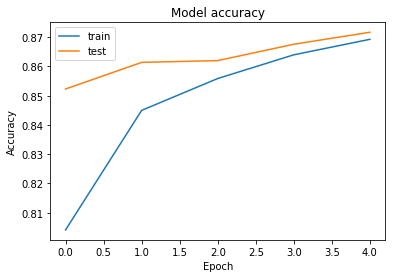

In [22]:
# Model Accuracy 
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

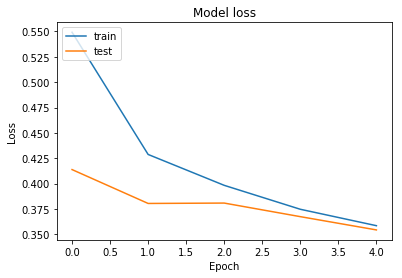

In [23]:

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
accuracy = model.evaluate(x=testX,y=test_Y,batch_size=10)
print("Accuracy: ", accuracy[1])

10000/10000 [==============================] - 1s 133us/step
Accuracy:  0.8716999942660332


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [25]:
sgd_optimizer = SGD(lr=0.001)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
model_history = model.fit(trainX, train_Y, 
          validation_data=(testX, test_Y), 
          epochs=5,
          batch_size=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 19s 321us/step - loss: 0.3236 - acc: 0.8823 - val_loss: 0.3378 - val_acc: 0.8807
Epoch 2/5
60000/60000 [==============================] - 19s 313us/step - loss: 0.3191 - acc: 0.8821 - val_loss: 0.3345 - val_acc: 0.8812
Epoch 3/5
60000/60000 [==============================] - 19s 309us/step - loss: 0.3133 - acc: 0.8860 - val_loss: 0.3339 - val_acc: 0.8801
Epoch 4/5
60000/60000 [==============================] - 18s 308us/step - loss: 0.3141 - acc: 0.8840 - val_loss: 0.3309 - val_acc: 0.8819
Epoch 5/5
60000/60000 [==============================] - 18s 306us/step - loss: 0.3122 - acc: 0.8857 - val_loss: 0.3326 - val_acc: 0.8809


In [27]:
accuracy = model.evaluate(x=testX,y=test_Y,batch_size=10)
print("Accuracy: ", accuracy[1])

10000/10000 [==============================] - 1s 96us/step
Accuracy:  0.8808999936580658


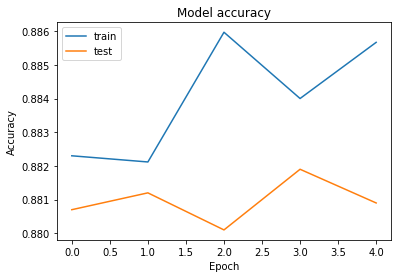

In [28]:
# Model Accuracy 
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='middle right')
plt.show()

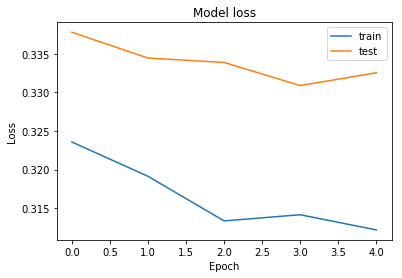

In [29]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='middle right')
plt.show()

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [30]:
model = Sequential()
model.add(Reshape((784,),input_shape=(28,28,)))
model.add(Dense(units=100,activation="sigmoid"))
model.add(Dense(units=100,activation="sigmoid"))
model.add(Dense(units=10,activation="softmax"))

sgd_optimizer = SGD(lr=0.03)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
model_history = model.fit(trainX, train_Y, 
          validation_data=(testX, test_Y), 
          epochs=5,
          batch_size=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 16s 261us/step - loss: 0.9310 - acc: 0.6738 - val_loss: 0.6052 - val_acc: 0.7747
Epoch 2/5
60000/60000 [==============================] - 15s 252us/step - loss: 0.5290 - acc: 0.8100 - val_loss: 0.5154 - val_acc: 0.8106
Epoch 3/5
60000/60000 [==============================] - 15s 252us/step - loss: 0.4634 - acc: 0.8338 - val_loss: 0.4770 - val_acc: 0.8281
Epoch 4/5
60000/60000 [==============================] - 15s 252us/step - loss: 0.4296 - acc: 0.8451 - val_loss: 0.4419 - val_acc: 0.8399
Epoch 5/5
60000/60000 [==============================] - 15s 254us/step - loss: 0.4082 - acc: 0.8523 - val_loss: 0.4406 - val_acc: 0.8414


In [32]:
accuracy = model.evaluate(x=testX,y=test_Y,batch_size=10)
print("Accuracy: ", accuracy[1])

10000/10000 [==============================] - 1s 89us/step
Accuracy:  0.8413999949991703


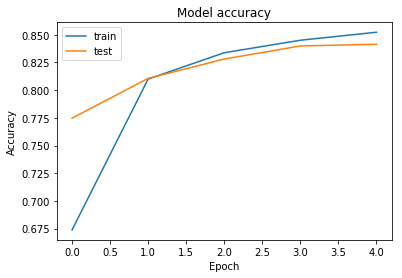

In [33]:
# Model Accuracy 
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='middle right')
plt.show()

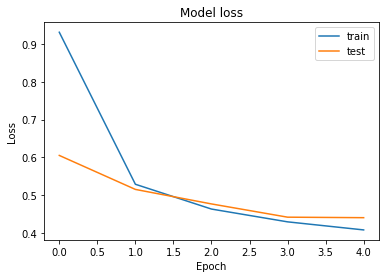

In [34]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='middle right')
plt.show()

## Review model

### Model with Batch Normalization layer after the input layer and learning rate to 0.001 in sgd optimizer is giving best accuracy